**a. Import the necessary packages**

In [ ]:
import tensorflow as tf # to
from tensorflow import keras
import matplotlib.pyplot as plt
import random

**b. Load the training and testing data (MNIST/CIFAR10)**

In [ ]:
mnist = tf.keras.datasets.mnist    #Importing MNIST Dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()  #splitting it into training and testing set

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train= x_train/255  #we need gray-sacle value between 0-1 so we divide it by 255
x_test=x_test/255

# img_len, img_wid = x_train[0].shape
# print(x_train.shape)

**c. Define the network architecture using Keras**

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),    # to convert data in vector form for input
    keras.layers.Dense(128,activation="relu"),    #hidden layer
    keras.layers.Dense(10,activation="softmax")   #output layer -transforms the raw outputs of the neural network into a vector of probabilities
])

# model.summary()

**d. Train the model using SGD**

In [ ]:
# from keras.src.backend import sparse_categorical_crossentropy
# from keras.src.optimizers import sgd
#train model using sgd

model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

**e. Evaluate the network**

313/313 [==============================] - 1s 2ms/step - loss: 0.1623 - accuracy: 0.9529
loss=0.162
Accuracy=0.953


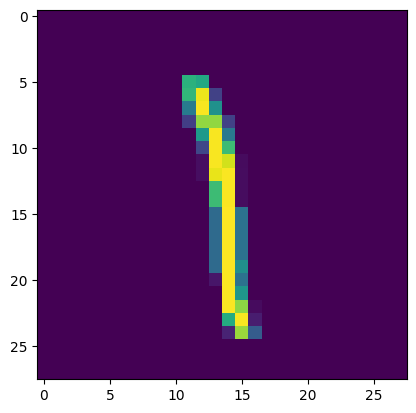

313/313 [==============================] - 1s 2ms/step


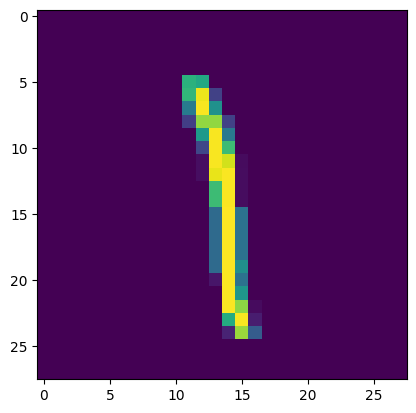

predicted value [9.5360963e-05 9.4080168e-01 3.2684596e-03 7.2930306e-03 5.4732763e-04
 1.6954355e-02 2.0438610e-03 5.4136813e-03 2.1952353e-02 1.6298250e-03]


In [ ]:
#evaluate the network
test_loss,test_acc=model.evaluate(x_test,y_test)
print("loss=%.3f"%test_loss)
print("Accuracy=%.3f"%test_acc)

n=random.randint(0,9999)
plt.imshow(x_test[n]) #used to display data as an image
plt.show()
predited_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

print('predicted value',predited_value[n])

**f. Plot the training loss and accuracy**

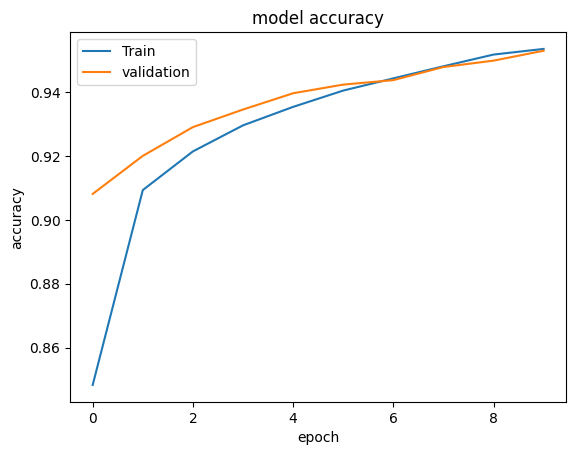

In [ ]:
#plot trainiingloss and accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')

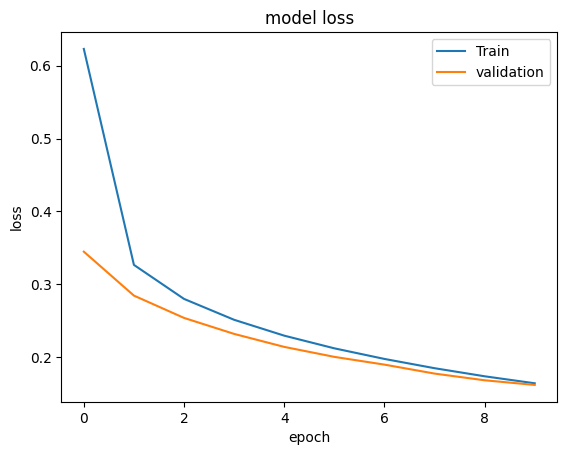

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper right')